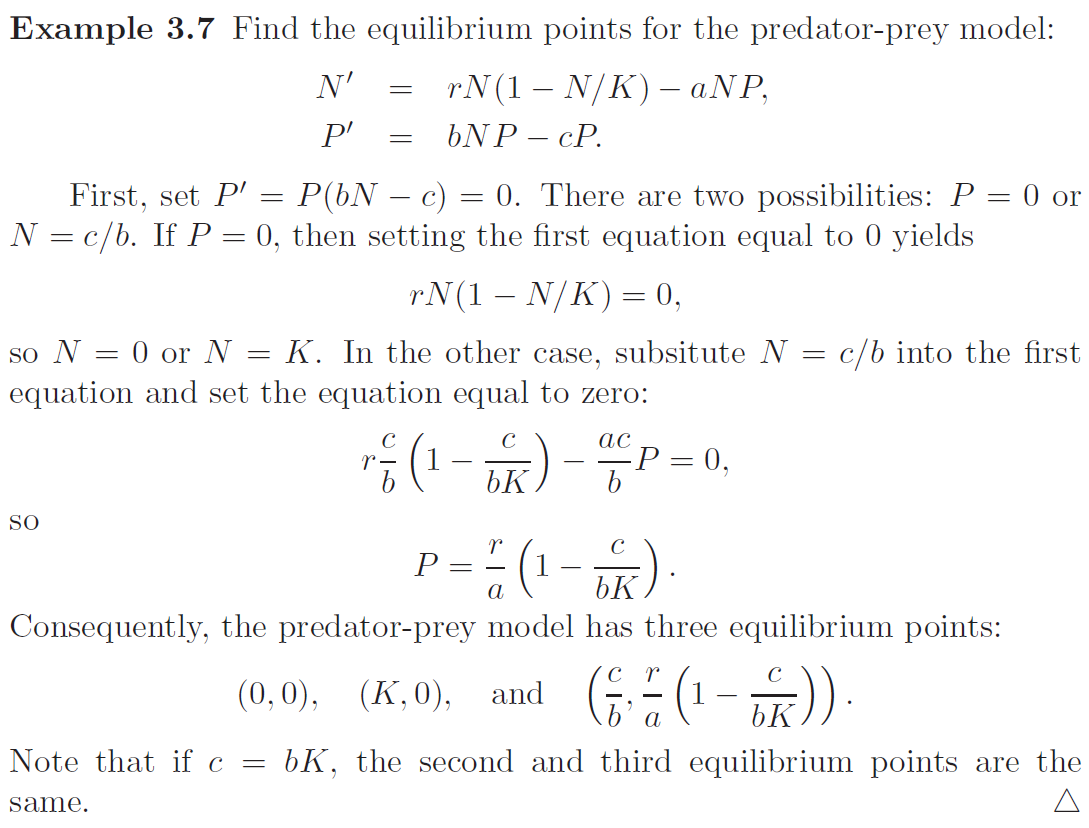

In [1]:
t,r,a,b,c,K = var('t,r,a,b,c,K')
N = function('N')(t)
P = function('P')(t)

Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P -c*P
 
eq1 = diff(N, t) == Nt
eq2 = diff(P, t) == Pt

solution = desolve_system([eq1, eq2], [N, P], ics=[0, 1, 1], ivar=t)

for i in range(2):
    print(solution[i].simplify_full())


N(t) == ilt(-(K*a*laplace(N(t)*P(t), t, g1634) + r*laplace(N(t)^2, t, g1634) - K)/(K*g1634 - K*r), g1634, t)
P(t) == ilt((b*laplace(N(t)*P(t), t, g1634) + 1)/(c + g1634), g1634, t)


In [2]:
t,r,a,b,c,N,P = var('t,r,a,b,c, N,P')

Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P -c*P

crit_points = solve([Nt==0, Pt==0], N, P)

for point in crit_points:
    print(point)


[N == 0, P == 0]
[N == K, P == 0]
[N == c/b, P == (K*b - c)*r/(K*a*b)]


In [3]:
pars = {r: 0.1, a: 0.1, b: 0.1, c: 0.1, K: 10}

F = (Nt.subs(pars), Pt.subs(pars))

print(F)

(-0.0100000000000000*(N - 10)*N - 0.100000000000000*N*P, 0.100000000000000*N*P - 0.100000000000000*P)


In [4]:
g = Graphics()

In [5]:

vector_field = plot_vector_field(F, (N, 0, 10), (P, 0, 10), color='blue', headlength=3, headwidth=3)
g += vector_field

In [6]:

crit_points_subs = list()
for point in crit_points:
    crit_points_subs.append(tuple(map(lambda x: x.subs(pars).rhs(), point)))

crit_points_subs


[(0, 0), (10, 0), (1.00000000000000, 0.900000000000000)]

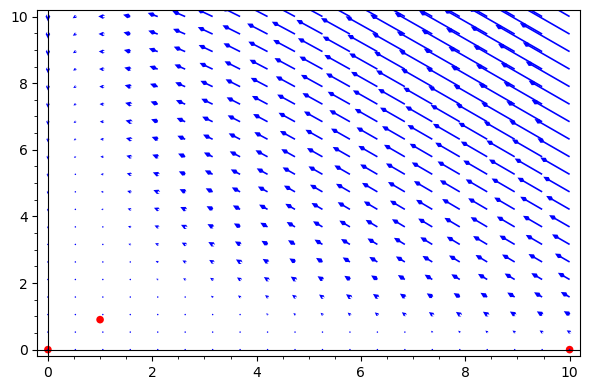

In [7]:
for point in crit_points_subs:
    g += point2d(point, color='red', pointsize=30)

g.show()